### Counting with pandas

Nucleotide and protein sequences are a great setting to learn probability and statistics.

We'll start by _counting_ how many times each amino acid shows up in a short protein sequence. The pandas package in Python provides useful data structures and methods for this data analysis task.

We'll start by creating a Python string (a `str`) containing the sequence of the short yeast protein Mfa1:
```
MQPSTATAAPKEKTSSEKKDNYIIKGVFWDPACVIA
```
and storing this in a variable named `mfa1`.

In [12]:
mfa1 = 'MQPSTATAAPKEKTSSEKKDNYIIKGVFWDPACVIA'

Next we'll `import` the NumPy and pandas packages so we can use all the great data structures and methods that they provide.

In [13]:
import numpy as np
import pandas as pd

In order to count how many times each amino acid shows up in this protein, we need to convert the `str` into a pandas `Series` of individual amino acid letters.

We can do this by converting the `str` into a `list` of individual letters, and then constructing a `Series` from that list.

In [14]:
print(list(mfa1))
print(pd.Series(list(mfa1)))

['M', 'Q', 'P', 'S', 'T', 'A', 'T', 'A', 'A', 'P', 'K', 'E', 'K', 'T', 'S', 'S', 'E', 'K', 'K', 'D', 'N', 'Y', 'I', 'I', 'K', 'G', 'V', 'F', 'W', 'D', 'P', 'A', 'C', 'V', 'I', 'A']
0     M
1     Q
2     P
3     S
4     T
5     A
6     T
7     A
8     A
9     P
10    K
11    E
12    K
13    T
14    S
15    S
16    E
17    K
18    K
19    D
20    N
21    Y
22    I
23    I
24    K
25    G
26    V
27    F
28    W
29    D
30    P
31    A
32    C
33    V
34    I
35    A
dtype: object


Once we have a `Series` of amino acids, we can use the `value_counts()` method to count how many times each amino acid letter (a "value" in the `Series`) occurs.

We'll store these counts in a variable named `mfa1_counts`.

In [18]:
mfa1_counts = pd.Series(list(mfa1)).value_counts()
mfa1_counts

A    5
K    5
S    3
I    3
T    3
P    3
E    2
D    2
V    2
M    1
N    1
G    1
Q    1
Y    1
F    1
W    1
C    1
dtype: int64

We can then _look up_ how many times each amino acid occurs in `mfa1_counts`. We can treat this `Series` just like a Python dictionary (`dict`) and use square brackets (`[]`) or the `get()` method.

Notice that these two ways of looking up counts give the same result, _except_ when a letter is missing from the `Series` the square brackets produce an error while `get()` returns `None`.

In [26]:
print(mfa1_counts.get("A"))
print(mfa1_counts.get("B"))
print(mfa1_counts["A"])
# print(mfa1_counts["B"])

5
None
5


### BioPython

Next, we'll move on to counting amino acids in the whole yeast proteome. I don't want to include all ~6,000 protein sequences in this notebook, and so we'll use existing Python tools to read it from a file.  The biopython module `Bio` has a sub-module specialized for reading and writing files of sequence data, called `SeqIO`. We'll import just the `SeqIO` sub-module from `Bio`.

In [27]:
from Bio import SeqIO

The SeqIO module has a function called `parse()` that reads sequence entries from a Fasta-format file. The Fasta format is pretty simple: each sequence has a name on a line starting with a >, followed by the sequence itself. So, a Fasta file might look like:

```
>one
AGCTACGT...
GCGATCGT...
>two
TGACTGCA...
...
```

The `parse()` function returns, in essence, an iterator that can loop over all the entries in the file. We just want to look at the first one, though, so we'll use `next` to take just one entry. The general approach is:

```
sequences = SeqIO.parse("my_file.fasta", "fasta")
sequence0 = next(sequences)
```

I have downloaded all of the protein sequences into a file named 
```
../S288C_R64-3-1/orf_trans_R64-3-1_20210421.fasta
```

In [30]:
proteins = SeqIO.parse("../S288C_R64-3-1/orf_trans_R64-3-1_20210421.fasta", "fasta")
protein = next(proteins)
protein

SeqRecord(seq=Seq('MVKLTSIAAGVAAIAATASATTTLAQSDERVNLVELGVYVSDIRAHLAQYYMFQ...AN*'), id='YAL068C', name='YAL068C', description='YAL068C PAU8 SGDID:S000002142, Chr I from 2169-1807, Genome Release 64-3-1, reverse complement, Verified ORF, "Protein of unknown function; member of the seripauperin multigene family encoded mainly in subtelomeric regions"', dbxrefs=[])

The `parse()` function will turn each of these into a `SeqRecord`, a custom data type that bundles together the name and the sequence. You can get the sequence name from record using `record.id` and the sequence itself using `record.seq`. This sequence isn't an ordinary Python string -- it's another custom data type, called a `Seq`, but you can convert it into a string using `str(record.seq)` and into a list of amino acid letters using `list(record.seq)`.

In [34]:
print('ID = ' + protein.id)
print('Seq = ' + str(protein.seq))
print(str(list(protein.seq)))

ID = YAL068C
Seq = MVKLTSIAAGVAAIAATASATTTLAQSDERVNLVELGVYVSDIRAHLAQYYMFQAAHPTETYPVEVAEAVFNYGDFTTMLTGIAPDQVTRMITGVPWYSSRLKPAISSALSKDGIYTIAN*
['M', 'V', 'K', 'L', 'T', 'S', 'I', 'A', 'A', 'G', 'V', 'A', 'A', 'I', 'A', 'A', 'T', 'A', 'S', 'A', 'T', 'T', 'T', 'L', 'A', 'Q', 'S', 'D', 'E', 'R', 'V', 'N', 'L', 'V', 'E', 'L', 'G', 'V', 'Y', 'V', 'S', 'D', 'I', 'R', 'A', 'H', 'L', 'A', 'Q', 'Y', 'Y', 'M', 'F', 'Q', 'A', 'A', 'H', 'P', 'T', 'E', 'T', 'Y', 'P', 'V', 'E', 'V', 'A', 'E', 'A', 'V', 'F', 'N', 'Y', 'G', 'D', 'F', 'T', 'T', 'M', 'L', 'T', 'G', 'I', 'A', 'P', 'D', 'Q', 'V', 'T', 'R', 'M', 'I', 'T', 'G', 'V', 'P', 'W', 'Y', 'S', 'S', 'R', 'L', 'K', 'P', 'A', 'I', 'S', 'S', 'A', 'L', 'S', 'K', 'D', 'G', 'I', 'Y', 'T', 'I', 'A', 'N', '*']


Now, let's count amino acids in this protein using `value_counts()`.

In [41]:
pd.Series(list(protein.seq)).value_counts()

A    19
T    13
V    11
S     9
L     8
I     8
Y     7
G     6
D     5
P     5
E     5
Q     4
M     4
R     4
F     3
N     3
K     3
H     2
*     1
W     1
dtype: int64

In order to count all the amino acids in the proteome, we'll need to keep a _running_ total of amino acids counted. It's easy to do this, though, because we can just add together two counts in order to get a sum.

First, let's get the first two proteins from the data file and store them in variables `protein0` and `protein1`.

In [43]:
proteins = SeqIO.parse("../S288C_R64-3-1/orf_trans_R64-3-1_20210421.fasta", "fasta")
protein0 = next(proteins)
print(protein0.name)
protein1 = next(proteins)
print(protein1.name)

YAL068C
YAL067W-A


Then, count amino acids in each of these proteins.

In [49]:
protein0_counts = pd.Series(list(protein0.seq)).value_counts()
protein1_counts = pd.Series(list(protein1.seq)).value_counts()
print(protein0_counts)

A    19
T    13
V    11
S     9
L     8
I     8
Y     7
G     6
D     5
P     5
E     5
Q     4
M     4
R     4
F     3
N     3
K     3
H     2
*     1
W     1
dtype: int64


In [50]:
print(protein1_counts)

L    9
V    8
R    7
P    7
K    6
I    6
S    5
F    5
Y    4
C    4
N    4
G    2
T    2
D    2
E    1
*    1
H    1
A    1
M    1
dtype: int64


Then, use the `Series.add()` method to add together the counts from `protein0` and `protein1`.

Because some proteins will entirely lack certain amino acids, we need to use the `fill_value` parameter for the `Series.add()` method to fill in a `0` value when an entry is missing. The default is to use a `None` value, leading to a "not-a-number" `NaN` value in the sum.

If we didn't need to use the `fill_value` in order to handle missing amino acids, we could just add together the counts using `+`.

In [61]:
total_counts = protein0_counts.add(protein1_counts, fill_value=0)
print(total_counts)

*     2.0
A    20.0
C     4.0
D     7.0
E     6.0
F     8.0
G     8.0
H     3.0
I    14.0
K     9.0
L    17.0
M     5.0
N     7.0
P    12.0
Q     4.0
R    11.0
S    14.0
T    15.0
V    19.0
W     1.0
Y    11.0
dtype: float64


Now, we can iterate over every sequence in the proteome and keep a running sum of amino acid frequencies.

We need to start with an empty set of amino acid counts. Because this is empty, we need to specify the data type for the series:
```
pd.Series(dtype='int64')
```

In [63]:
proteins = SeqIO.parse("../S288C_R64-3-1/orf_trans_R64-3-1_20210421.fasta", "fasta")
total_counts = pd.Series(dtype='int64')

for protein in proteins:
    protein_counts = pd.Series(list(protein.seq)).value_counts()
    total_counts = total_counts.add(protein_counts, fill_value=0)
print(total_counts)

*      6064.0
A    161450.0
C     37287.0
D    171556.0
E    191723.0
F    130264.0
G    146138.0
H     63795.0
I    192717.0
K    215733.0
L    279435.0
M     61220.0
N    180883.0
P    128629.0
Q    116054.0
R    130554.0
S    264092.0
T    173814.0
V    163368.0
W     30592.0
Y     99429.0
dtype: float64


The counts are now listed in amino acid alphabetical order -- the order of the "index".

In order to figure out the most and least common amino acids, we can sort the `total_counts` data frame according to the "values" with the `Series.sort_values()` method.

In [64]:
print(total_counts.sort_values())

*      6064.0
W     30592.0
C     37287.0
M     61220.0
H     63795.0
Y     99429.0
Q    116054.0
P    128629.0
F    130264.0
R    130554.0
G    146138.0
A    161450.0
V    163368.0
D    171556.0
T    173814.0
N    180883.0
E    191723.0
I    192717.0
K    215733.0
S    264092.0
L    279435.0
dtype: float64


### matplotlib

It's also pretty easy to make plots of data in a `Series`. To do this, we need to import another module
```
import matplotlib.pyplot as plt
```

In [65]:
import matplotlib.pyplot as plt 

Now, we can use a `plot()` method on our data series. The default plot is a line plot, but a bar plot makes more sense for this kind of data and so we use the `kind='bar'` argument to the `Series.plot()` method.
```
total_counts.plot(kind='bar')
```
You may find it makes more sense to plot the sorted versions of these `Series`

<AxesSubplot:>

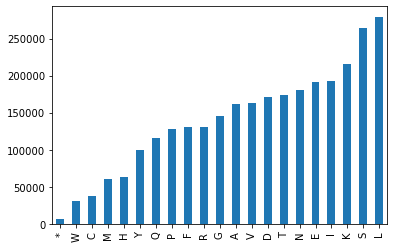

In [70]:
total_counts.sort_values().plot(kind='bar')

### _Exercise_ 

The file `../S288C_R64-3-1/S288C_reference_sequence_R64-3-1_20210421.fsa` has the nucleotide sequence of the yeast genome. Each chromosome has its own sequence entry. 

Count the nucleotide frequencies in the genome.

Plot a bar graph of nucleotide counts.

ref|NC_001133|
ref|NC_001134|
ref|NC_001135|
ref|NC_001136|
ref|NC_001137|
ref|NC_001138|
ref|NC_001139|
ref|NC_001140|
ref|NC_001141|
ref|NC_001142|
ref|NC_001143|
ref|NC_001144|
ref|NC_001145|
ref|NC_001146|
ref|NC_001147|
ref|NC_001148|
ref|NC_001224|
A    3766349.0
C    2320576.0
G    2317100.0
T    3753080.0
dtype: float64


<AxesSubplot:>

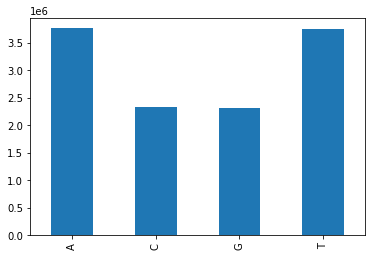

In [73]:
chroms = SeqIO.parse("../S288C_R64-3-1/S288C_reference_sequence_R64-3-1_20210421.fsa", "fasta")
nt_count = pd.Series(dtype='int64')
for chrom in chroms:
    print(str(chrom.name))
    nt_count = nt_count.add(pd.Series(list(chrom.seq)).value_counts(), fill_value=0)
print(nt_count.sort_index())
nt_count.sort_index().plot(kind='bar')
 